In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(xtr,ytr),(xte,yte)=mnist.load_data()

In [3]:
xtr.shape

(60000, 28, 28)

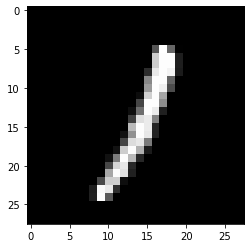

In [4]:
plt.imshow(xtr[99], cmap='gray')

In [5]:
ytr[99]

1

In [6]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],1).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],1).astype('float32')/255

In [7]:
ytr=tcg(ytr)
yte=tcg(yte)

In [8]:
model = Sequential([
  Flatten(input_shape=(28, 28, 1)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [10]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=13, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 11s 191us/sample - loss: 0.3494 - accuracy: 0.8964 - val_loss: 0.1608 - val_accuracy: 0.9524
Epoch 2/13
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1289 - accuracy: 0.9609 - val_loss: 0.1113 - val_accuracy: 0.9667
Epoch 3/13
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0845 - accuracy: 0.9737 - val_loss: 0.0911 - val_accuracy: 0.9703
Epoch 4/13
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0606 - accuracy: 0.9805 - val_loss: 0.1029 - val_accuracy: 0.9677
Epoch 5/13
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0823 - val_accuracy: 0.9755
Epoch 6/13
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.0866 - val_accuracy: 0.9731
Epoch 7/13
60000/60000 [==============================

In [11]:
model.evaluate(xtr,ytr)

60000/60000 [==============================] - 8s 134us/sample - loss: 0.0201 - accuracy: 0.9939


[0.020064510584842054, 0.9939]

In [12]:
score = model.evaluate(xte,yte)

10000/10000 [==============================] - 1s 148us/sample - loss: 0.1115 - accuracy: 0.9760


In [13]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11146954005803564
Test accuracy: 0.976


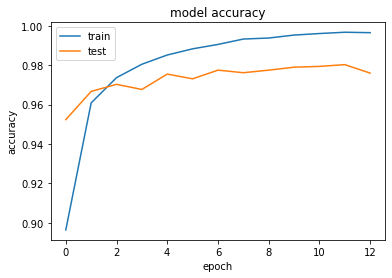

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.save("mnist.h5")